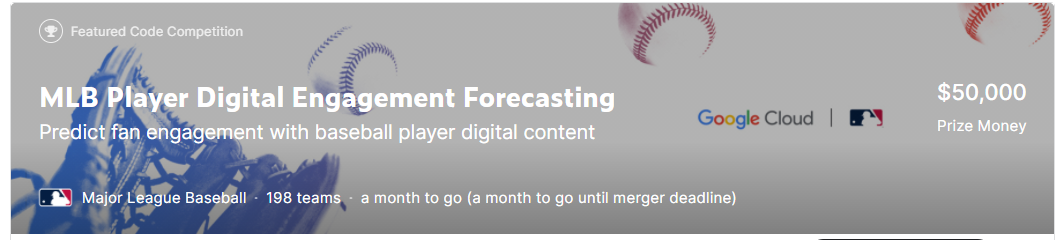

## なにか１つコンペで銅メダルをとろうとしています。どれが一番簡単か全部みましたが、全部難しい🙇
## 結局、全部のコンペに参加して中途半端な感じになっています。
## どうやるのが、一番いいんですかね。

thanks https://www.kaggle.com/ryanholbrook/getting-started-with-mlb-player-digital-engagement

# MLBプレーヤーデジタルエンゲージメント予測入門 #

> 📌このコンテストでは、ファンがMLBプレーヤーのデジタルコンテンツを将来の日付範囲で毎日どのように利用するかを予測します。プレーヤーのパフォーマンスデータ、ソーシャルメディアデータ、市場規模などのチーム要因にアクセスできます。成功したモデルは、どのシグナルがエンゲージメントと最も強く相関し、影響を与えるかについての新しい洞察を提供します。
> 
> MLBオールスターラウンドをシーズンを通して予測できるかどうか、またはチームの25人のプレーヤーのそれぞれが脚光を浴びているときを想像してみてください。これらの洞察は、アメリカの娯楽のファンダムを深く掘り下げるときに可能になります。この種の最初の方法の一部として、プレーヤーレベルでのデジタルエンゲージメントをこのきめ細かい日常的な方法で理解しようとします。同時に、Google Cloudのデータ分析、Vertex AI、MLOpsツールを使用して、MLBがイノベーションをより簡単に構築できるように支援します。 MLBファンとプレーヤーのエンゲージメントの未来を形作る上で役割を果たすことができます。

> 📌あなたは、2021年シーズンに活躍するMLBプレーヤーのサブセットについて、4つの異なるエンゲージメントの測定値（target1-target4）を予測する必要があります。データには、時間の経過とともに変化しない一連の静的ファイル（players.csv、teams.csv、seasons.csv、awards.csv）と、日ごとにグループ化された日次データ（train.csv）が含まれています。特定の日付を予測する場合、次の日のターゲット変数を予測します（つまり、日付dの場合、日d + 1のエンゲージメントを予測します）。
> 
> これは、時系列モジュールに依存してモデルが時間的に前向きにならないようにするコード競争です。時系列モジュールは、テストデータを提供し、送信ファイルを自動的に書き込みます。テストデータは、ターゲット値が含まれていないことを除いて、train.csvと同じ形式のデータフレームで到着します。提出するには、評価ページの指示に従ってください。ノートブックを送信すると、表示されていないテストセットで再実行されます。
> 
> コンテストのトレーニングフェーズでは、この目に見えないテストセットは、2021年5月の月のデータと今年のアクティブなプレーヤーのセットで構成されます。
> 評価フェーズでは、テストセットは約1か月の将来のシーズン範囲になります。
> コードは堅牢で、モジュールによって要求されたdate_playerIdの組み合わせを予測する必要があります。各チームが選択したノートブック（チームごとに最大2つ、最終提出期限までに選択）は、評価フェーズ中に再実行されます。

thanks https://www.kaggle.com/chumajin/eda-of-mlb-for-starter-version
このコンペは、MLBのplayer idごとに、次の日(将来)にファンがデジタルコンテンツへのエンゲージメント（「反応」「行動」みたいなもの)をどれくらい起こすかというのを数値化したもの(target)を予測するコンペだと思います。targetは1～4で、それぞれ異なる指標で4つあって、0-100のスケールで数値化したものだそうです。player idごとに次の日のtarget1～4という評価項目の期待値を推測するコンペだそうです。


In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/2020-cost-of-living/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert"><font color="black">
🚀 <b>Competition Goal</b>: detect GW <i>(Gravitational Wave)</i> このコンペは、MLBのplayer idごとに、次の日(将来)にファンがデジタルコンテンツへのエンゲージメント（「反応」「行動」みたいなもの)をどれくらい起こすかというのを数値化したもの(target)を予測するコンペだと思います
</div>

# スケジュール

### 2021年7月31日-最終提出期限。 これは、評価期間中に再実行される2つの最終提出物を選択する期限でもあります

### 2021年9月15日-コンテスト終了日。 この時までに、最終的なリーダーボードが明らかになります。

# ディスカッションメモ

最も一般的に受け入れられている統計は次のとおりです。 →そのデータはplayerBoxScoresだと思う。<br>
打率：プレーヤーの打席の何パーセントがベースヒットになるかを測定します。<br>
打点（RBI）：この統計は、フィールディングチームによるエラーのために得点されたランを除いて、打者が打席から生成したランの総数を測定します。打者は、ヒット（ホームランを含む）、犠牲バント、犠牲フライ、内野外、または野手選択でランナーの得点につながると、打点が与えられます。さらに、打者が歩いたり（四球をベースに）、ピッチに当たったり、干渉したりして、ベースがいっぱいになってランにつながるベースに乗った場合、バッターは打点を受け取ります。<br>
本塁打：ほとんどの本塁打は外野のフェンスを越えて打たれますが、打者がボールをフィールドに打ったときにプレーヤーが公園内の本塁打を打つことがありますが、タグが付けられていないか、エラーが発生しています。<br>
出塁率（OBP）：この統計は、打者が出塁率に到達する頻度を測定します。出塁をプレートの外観で割ったものとほぼ同じです。<br>
長打率：総ベース数を打席数で割ったもの。この統計は、打者の真の力を測定します。 OBPは、出塁率と長打率（OPS）を決定するために、長打率に追加されます。<br>

現在、大活躍中！！　大谷さん。

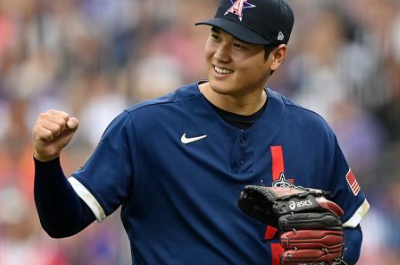

In [ ]:
import gc
import sys
import warnings
from joblib import Parallel, delayed 
#Parallelとdelayedを組み合わせることによってマルチプロセスの並列化を実現することが出来ます。
from pathlib import Path

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#この辺の知識が重要だと思われる。
from statsmodels.tsa.deterministic import (CalendarFourier,#暦時間に基づくフーリエ級数の決定論的項?     
                                           CalendarSeasonality,#暦時間に基づく季節ダミー決定論的用語
                                           CalendarTimeTrend,
                                           DeterministicProcess)#サンプル外予測の決定論的傾向を生成する

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.experimental.preprocessing import StringLookup
from datetime import timedelta

warnings.simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
features = [
    "hits",
    "strikeOuts",
    "homeRuns",
    "runsScored",
    "stolenBases",
    "strikeOutsPitching",
    "inningsPitched",
    "strikes",
    "flyOuts",
    "groundOuts",
    "errors",
]

### データフレームの読み取りと抽出

In [ ]:
# Helper function to unpack json found in daily data
def unpack_json(json_str):
    return pd.DataFrame() if pd.isna(json_str) else pd.read_json(json_str)


def unpack_data(data, dfs=None, n_jobs=-1): #これか
    if dfs is not None:
        data = data.loc[:, dfs]
    unnested_dfs = {}
    for name, column in data.iteritems():
        daily_dfs = Parallel(n_jobs=n_jobs)(
            delayed(unpack_json)(item) for date, item in column.iteritems())
        df = pd.concat(daily_dfs)
        unnested_dfs[name] = df
    return unnested_dfs

### ４つのファイルを読んでみます。

In [ ]:
data_dir = Path('../input/mlb-player-digital-engagement-forecasting/')

df_names = ['seasons', 'teams', 'players', 'awards']

for name in df_names:
    globals()[name] = pd.read_csv(data_dir / f"{name}.csv")

kaggle_data_tabs = widgets.Tab() #この指定も必要

kaggle_data_tabs.children = list([widgets.Output() for df_name in df_names])  #>>>>>これを出力するとかっこいいリストになる

for index in range(0, len(df_names)):
    # titleの名前を変える
    kaggle_data_tabs.set_title(index, df_names[index])
    
    # Display corresponding table output for this tab name
    with kaggle_data_tabs.children[index]:
        display(eval(df_names[index]))

display(kaggle_data_tabs)

・試合形式は、レギュラーシーズンとポストシーズンで構成され、最終的に各リーグの優勝チームがワールドシリーズと呼ばれる優勝決定戦を行いワールドチャンピオンを決定する。レギュラーシーズンは4月初旬から9月下旬にかけて各チームが162試合を行い地区優勝を争う。10月初旬からポストシーズンがトーナメント形式で行われる。トーナメントでは各段階ごとにディビジョンシリーズ、リーグチャンピオンシップシリーズ、ワールドシリーズと冠される。<br>
・２９チームもあるんですね。<br>
・２０６１人のメジャーリーガー<br>
・１１２５６個もの賞。賞は４５５種類といろいろあります。

あんまり関係ないかもしれませんが、賞の内容をみてみる。たんなる興味本位です。

In [ ]:
pd.read_csv(data_dir / f"awards.csv")['awardName'].value_counts()

# awards.csv<br>
このファイルには、日次データの開始前（つまり、2018年以前）にトレーニングセットのプレーヤーが獲得した賞が含まれています。<br>

awardDate - 賞が授与された日付.<br>
awardSeason - シーズン賞？.<br>
awardId<br>
awardName<br>
playerId - プレーヤーの一意の識別子。<br>
playerName<br>
awardPlayerTeamId<br>

# players.csv<br>

大谷さんを探してみる。完全に興味本位。

In [ ]:
import pandas as pd
oh = pd.read_csv('../input/mlb-player-digital-engagement-forecasting/players.csv')
oh[oh['playerName']=='Shohei Ohtani']


playerId - プレーヤーの一意の識別子。<br>

playerName<br>
DOB - プレーヤーの生年月日。関係ある？<br>
mlbDebutDate<br>
birthCity<br>
birthStateProvince<br>
birthCountry<br>
heightInches<br>
weight<br>
primaryPositionCode - プレーヤーの主要な位置コード<br>
primaryPositionName - プレーヤーの主要な位置<br>
playerForTestSetAndFuturePreds - ブール値、テストデータで予測が行われるプレーヤーの中にプレーヤーが含まれている場合はtrue<br>

seasons.csv,teams.csvは説明なし。中身をみよということだと思う。

# games<br>


gamePk -ゲームの一意の識別子<br>
gameType - Gゲームの種類、さまざまな種類がここにあります。<br>
season<br>
gameDate<br>
gameTimeUTC - UTCでの始球式。<br>
resumeDate - タイムゲームが再開されました（放棄された場合、それ以外の場合はnull）。<br>
resumedFrom - タイムゲームは元々放棄されていました（放棄された場合、それ以外の場合はnull）。<br>
codedGameState -ゲームのステータスコード、さまざまなタイプがここにあります。<br>
detailedGameState - ゲームのステータス、さまざまなタイプがここにあります。<br>
isTie - ブール値。ゲームが引き分けで終了した場合はtrue。<br>
gameNumber - ダブルヘッダーを区別するためのゲーム番号フラグ-1または2。<br>
doubleHeader - YはDH、Nはシングルゲーム、Sはスプリットチケットです。<br>
dayNight - スケジュールされた開始時間の昼または夜のフラグ。<br>
scheduledInnings - 予定イニング数。<br>
gamesInSeries - 現在のシリーズのゲーム数<br>
seriesDescription - 現在のシリーズのテキスト説明。<br>
homeId - ホームチームの一意の識別子。<br>
homeName - ホームチーム名。<br>
homeAbbrev - ホームチームの略語。<br>
homeWins - ホームチームのシーズンの現在の勝利数.<br>
homeLosses - ホームチームのシーズンでの現在の損失数。<br>
homeWinPct - ホームチームの現在の勝率。<br>
homeWinner - ブール値。ホームチームが勝った場合はtrue。<br>
homeScore - ホームチームが得点したラン。<br>
awayId - アウェイチームの一意の識別子。<br>
awayName - アウェイチームの一意の識別子。<br>
awayAbbrev - アウェイチームの略語。<br>
awayWins -アウェイチームのシーズンの現在の勝利数。<br>
awayLosses - アウェイチームのシーズン中の現在の損失数。<br>
awayWinPct - アウェイチームの現在の勝率。<br>
awayWinner - ブール値。離れたチームが勝った場合はtrue。<br>
awayScore - アウェイチームが得点したラン。

# rosters<br>
playerId - プレーヤーの一意の識別子。<br>
gameDate<br>
teamId - そのプレーヤーがその日にいるteamId.<br>
statusCode - 名簿ステータスの略語。<br>
status - 説明的な名簿のステータス。

# playerBoxScores　　多くない？<br>


home - バイナリ、ホームチームの場合は1、離れている場合は0。<br>
gamePk - ゲームの一意の識別子。<br>
gameDate<br>
gameTimeUTC - UTCでの始球式。<br>
teamId - チームの一意の識別子。<br>
teamName<br>
playerId - プレーヤーの一意の識別子。プレーヤの名前<br>
jerseyNum<br>
positionCode - 番号位置コード<br>
positionName - テキスト位置表示<br>
positionType - ポジショングループ<br>
battingOrder - 形式：「###」。最初の桁は打順スポットを示し、次の2桁はそのプレーヤーがその打順スポットを占めた順序を示します。 例：「300」は、打順の3番目のスポットのスターターを示します。 4人目（900、901、902以降）が打順9位を占めることを示す「903」。 ゲームに登場した場合にのみ入力されます。<br>
gamesPlayedBatting - プレーヤーが打者、ランナー、または野手としてゲームに参加した場合は1。<br>
flyOuts - ゲームの合計フライアウト。<br>
groundOuts - ゲームのトータルグラウンドアウト。<br>
runsScored - ゲームの合計ランが記録されました。<br>
doubles -ゲームの合計は2倍になります。<br>
triples - ゲームの合計トリプル。<br>
homeRuns - ゲームの総本塁打。<br>
strikeOuts - ゲームの総三振。<br>
baseOnBalls - ゲームの合計ウォーク。<br>
intentionalWalks - ゲームの故意四球。<br>
hits - ゲームの総ヒット数。<br>
hitByPitch - ピッチによるゲームの合計ヒット。<br>
caughtStealing - ゲームの合計が盗塁をキャッチしました。<br>
stolenBases - ゲームの盗塁総数。<br>
groundIntoDoublePlay - ゲームの合計併殺はに基づいています。<br>
groundIntoTriplePlay - ゲームの合計トリプルプレイはに基づいています<br>
plateAppearances - ゲームの総打席。<br>
totalBases - ゲームの総拠点数.<br>
rbi -ゲームの合計打点。<br>
leftOnBase - ゲームの総ランナーはベースに残った。<br>
sacBunts - ゲームの合計犠牲バント。<br>
sacFlies - ゲームの犠牲フライ。<br>
catchersInterference - ゲームのトータルキャッチャーの干渉が発生しました。<br>
pickoffs - ゲームの合計回数がベースから外れました。<br>
gamesPlayedPitching- バイナリ、プレーヤーがピッチャーとしてゲームに参加した場合は1。<br>
gamesStartedPitching- バイナリ、プレーヤーがゲームの先発投手だった場合は1。<br>
completeGamesPitching - バイナリ、完投でクレジットされている場合は1<br>
shutoutsPitching - バイナリ、完封でクレジットされている場合は1。<br>
winsPitching -バイナリ、勝利がクレジットされている場合は1。<br>
lossesPitching - バイナリ、損失がクレジットされている場合は1<br>
flyOutsPitching - 許可されたフライアウトのゲーム合計<br>
airOutsPitching - エアアウト（フライアウト+ポップアウト）のゲーム合計が許可されます。<br>
groundOutsPitching - ゲームの合計グラウンドアウトが許可されます。<br>
runsPitching - ゲームの合計実行が許可されます。<br>
doublesPitching - ゲームの合計は2倍になります<br>
triplesPitching - ゲームの合計トリプルが許可されます<br>
homeRunsPitching - ゲームの合計ホームランが許可されます。<br>
strikeOutsPitching - ゲームの合計三振が許可されます<br>
baseOnBallsPitching - ゲームの合計歩行が許可されます。<br>
intentionalWalksPitching - ゲームの故意四球の合計が許可されます。<br>
hitsPitching -許可されるゲームの合計ヒット数<br>
hitByPitchPitching - 許可されたピッチによるゲームの合計ヒット。<br>
atBatsPitching - ゲームの総打席数.<br>
caughtStealingPitching - ゲームの合計は、盗みをキャッチしました。<br>
stolenBasesPitching -ゲームの盗塁の合計は許可されます。<br>
inningsPitched - ゲームの総投球回。<br>
saveOpportunities -バイナリ、保存の機会がある場合は1。<br>
earnedRuns - ゲームの合計自責点は許可されています。<br>
battersFaced - 直面したゲームの総打者<br>
outsPitching - ゲームの合計アウトが記録されました。<br>
pitchesThrown - 投げられた投球のゲーム総数。<br>
balls - 投げられたゲームの合計ボール.<br>
strikes - スローされたゲームの合計ストライク<br>
hitBatsmen - ゲームの総死球打者。<br>
balks - ゲームの合計はボークします。<br>
wildPitches - 投げられた暴投のゲーム総数。<br>
pickoffsPitching - ゲームのピックオフの総数。<br>
rbiPitching - 打点のゲーム総数は許可されています。<br>
inheritedRunners - 継承されたランナーのゲーム合計を想定。<br>
inheritedRunnersScored- 得点した継承されたランナーのゲーム合計。<br>
catchersInterferencePitching - キャッチャーの干渉のゲーム合計はバッテリーによって発生しました<br>
sacBuntsPitching - ゲームの犠牲バントの合計が許可されます<br>
sacFliesPitching - ゲームの犠牲フライは許可されています。<br>
saves -バイナリ、保存でクレジットされている場合は1<br>
holds -バイナリ、保留がクレジットされている場合は1。<br>
blownSaves - バイナリ、ブローセーブでクレジットされている場合は1。<br>
assists - ゲームのアシスト総数。<br>
putOuts - ゲームの刺殺の総数<br>
errors - ゲームのエラーの総数。<br>
chances - ゲームのトータルフィールディングチャンス。

# teamBoxScores　<br>

# transactions<br>

# team_twitter_followers<br>
Twitterのフォローデータは、MLBによってメジャーリーグプレーヤーのTwitter APIから毎月1日に収集され、2018年1月1日までさかのぼります。 すべてのプレーヤーがTwitterアカウントを持っている/持っているわけではない、プレーヤーがランダムにアカウントを作成/削除/復元する、または特定の日にフォロワーデータを収集できないその他のシナリオがあるため、このデータセットはすべての月にわたってすべてのプレーヤーを網羅しているわけではありません。

# player_twitter_followers<br>
Twitterのフォローデータは、2018年1月1日までさかのぼって、毎月1日に、メジャーリーグの30チームすべてのTwitterAPIからMLBによって収集されました。<br>

# standings<br>

トレーニングデータは、各プレーヤーに関する情報を含むネストされたJSONフィールドの時間インデックス付きコレクションです。 ターゲットは `nextDayPlayerEngagement`列に含まれ、残りの列には機能の構築に使用できるデータが含まれています。 

In [ ]:
%%time
# Define dataframes to load from training set　#全部指定すると1.5273
dfs = [
    'nextDayPlayerEngagement', 
    'playerBoxScores',  
    # Other dataframes available for features:
    'games',#ためしに１個追加するとどうなるんだろう？1.6580と悪化した。
    'rosters',
    'teamBoxScores', #悪化　1.6027
    'transactions', #1.5734
    'standings',# 少し改善するので指定する。　1.5107
    'awards',
    'events', 
    'playerTwitterFollowers',#1.5299
    'teamTwitterFollowers',
]

# Read training data
training = pd.read_csv(
    data_dir / 'train.csv',
    usecols=['date'] + dfs, #合計3 columns
)

# Convert training data date field to datetime type
training['date'] = pd.to_datetime(training['date'], format="%Y%m%d")
training = training.set_index('date').to_period('D')
print(training.info())

# 生データ<br>
どれが重要かいまはわかりませんが、いろんな項目があります。

In [ ]:
pd.read_csv(data_dir / 'train.csv').head()

# train.csv<br>
これには、2018年以降のある時点でアクティブなMLBプレーヤーに関するデータが含まれます。予測は2021年にアクティブなプレーヤーについてのみスコアリングされます（上記を参照）が、探索とモデリングの目的でより多くのデータを提供するために、前シーズンのプレーヤーがここに含まれています。<br>

date -CSVのプライマリインデックスである整数形式の日付。<br>
nextDayPlayerEngagement - 翌日のすべてのモデリングターゲットを含むネストされたJSON。<br>
games -特定の日のすべてのゲーム情報を含むネストされたJSON。 レギュラーシーズンに加えて、春季トレーニングとエキシビションゲームが含まれています。<br>
rosters - 特定の日のすべての名簿情報を含むネストされたJSON。 シーズン中およびオフシーズンのチーム名簿が含まれます。<br>
playerBoxScores - 特定の日のプレーヤーのゲームレベルで集計されたゲーム統計を含むネストされたJSON。 レギュラーシーズン、ポストシーズン、オールスターゲームが含まれます。<br>
teamBoxScores - 特定の日のチームゲームレベルで集計されたゲーム統計を含むネストされたJSON。 レギュラーシーズン、ポストシーズン、オールスターゲームが含まれます。<br>
transactions - 特定の日のMLBチームに関連するすべてのトランザクション情報を含むネストされたJSON。<br>
standings - 特定の日のMLBチームに関連するすべての順位情報を含むネストされたJSON。<br>
awards - 特定の日に配布されたすべての賞または優等生を含むネストされたJSON。<br>
events - 特定の日のすべてのフィールドゲームイベントを含むネストされたJSON。 レギュラーシーズンとポストシーズンのゲームが含まれます。<br>
playerTwitterFollowers - その日の一部のプレーヤーのTwitterフォロワー数を含むネストされたJSON。<br>
teamTwitterFollowers - その日の各チームのTwitterフォロワー数を含むネストされたJSON。<br>

pd.read_csv(data_dir / 'train.csv').head(5)

# 加工データ

In [ ]:
training[:5]

### この中身はすごく長い。たった１日でも308069文字もある。

In [ ]:
len(training['nextDayPlayerEngagement'][0])

### ”nextDayPlayerEngagement”欄になにが入っているかみてみました。すごく長い文章が格納されています。

In [ ]:
training['nextDayPlayerEngagement'][0][:1500] #見ずらい。。。

In [ ]:
# ネストされたデータフレームを解凍し、辞書 `training_dfsに保存します`
training_dfs = unpack_data(training, dfs=dfs) #unpack_data関数を呼んでいる
print('\n', training_dfs.keys())

### このtraining['nextDayPlayerEngagement']を綺麗に加工しています。かなり見やすい。



# ”nextDayPlayerEngagement”欄を見やすくする
ここで言えるのは、目的変数のtarget1-target4は、他の項目から機械学習で推測できるかなあ、という程度でしょうか。<br>
人の名前やチーム名があったり、NaNがあったりと厄介ですが。名前は関係ないですよね。

In [ ]:
training_dfs #このtarget1-4が目的関数

In [ ]:
def train_lag(df, lag=1):
    dp = df[["playerId","date"]+TGTCOLS].copy()
    dp["date"]  =dp["date"] + timedelta(days=lag) 
    df = df.merge(dp, on=["playerId", "date"], suffixes=["",f"_{lag}"], how="left")
    return df

In [ ]:
pids_test = players.playerId.loc[
    players.playerForTestSetAndFuturePreds.fillna(False)
].astype(str)

# Name of target columns
targets = ["target1", "target2", "target3", "target4"]


def make_playerBoxScores(dfs: dict, features):
    X = dfs['playerBoxScores'].copy()
    X = X[['gameDate', 'playerId'] + features]
    # Set dtypes
    X = X.astype({name: np.float32 for name in features})
    X = X.astype({'playerId': str})
    # Create date index
    X = X.rename(columns={'gameDate': 'date'})
    X['date'] = pd.PeriodIndex(X.date, freq='D')
    # Aggregate multiple games per day by summing
    X = X.groupby(['date', 'playerId'], as_index=False).sum()
    return X


def make_targets(training_dfs: dict): #training_dfsをここでつかっている
    Y = training_dfs['nextDayPlayerEngagement'].copy()
    # Set dtypes
    Y = Y.astype({name: np.float32 for name in targets})
    Y = Y.astype({'playerId': str})
    # Match target dates to feature dates and create date index
    Y = Y.rename(columns={'engagementMetricsDate': 'date'})
    Y['date'] = pd.to_datetime(Y['date'])
    Y = Y.set_index('date').to_period('D')
    Y.index = Y.index - 1
    return Y.reset_index()


def join_datasets(dfs):
    dfs = [x.pivot(index='date', columns='playerId') for x in dfs]
    df = pd.concat(dfs, axis=1).stack().reset_index('playerId')
    return df


def make_training_data(training_dfs: dict,#training_dfsをここでつかっている
                       features,
                       targets,
                       fourier=4,
                       test_size=30):
    # Process dataframes
    X = make_playerBoxScores(training_dfs, features)
    Y = make_targets(training_dfs)
    
    
    # Merge for processing
    df = join_datasets([X, Y])
    
    
    # Filter for players in test set
    df = df.loc[df.playerId.isin(pids_test), :]
    # Convert from long to wide format
    df = df.pivot(columns="playerId")
    # Restore features and targets
    X = df.loc(axis=1)[features, :]
    Y = df.loc(axis=1)[targets, :]
    # Fill missing values in features
    X.fillna(-1, inplace=True)
    # Create temporal features
    fourier_terms = CalendarFourier(freq='A', order=fourier)
    deterministic = DeterministicProcess(
        index=X.index,
        order=0,
        seasonal=False,  # set to True for weekly seasonality
        additional_terms=[fourier_terms],
    )
    X = pd.concat([X, deterministic.in_sample()], axis=1)
    # Create train / validation splits
    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        Y,
        test_size=test_size,
        shuffle=False,
    )
    return X_train, X_valid, y_train, y_valid, deterministic

このセルでは、 `playerBoxScores`から使用する機能を定義します。 このフレームには、トレーニング期間中のすべてのゲームのプレーヤー統計が含まれています。 利用可能な多くの中からほんの数個を選択しました。 `make_training_data`関数は、次のセクションのデータ探索によって動機付けられた、年間の季節性をモデル化するいくつかの機能にも隣接しています。

# 実験

すごい難しいコードですが、players.playerForTestSetAndFuturePredsがNaNであったらFalseをセットしている。４件あります。

In [ ]:
pids_test = players.playerId.loc[
    players.playerForTestSetAndFuturePreds.fillna(False)
].astype(str)
pids_test

4つNanがある。そこにはFalseを格納する。

In [ ]:
len(players)

In [ ]:
players.playerForTestSetAndFuturePreds.isnull().sum() #.fillna(False)

日付、playerID毎に出ているということは、試合毎のプライヤーの成績ということかな。

In [ ]:
X= make_playerBoxScores(training_dfs, features) 
X

target1-4を抽出している。これもゲーム、playerId毎に出している。

In [ ]:
Y =make_targets(training_dfs)
Y

FacetGridだとなにかわからないかなあ。メモリ不足になるので無理でした。

In [ ]:
#a = sns.FacetGrid(Y, hue = 'target2', aspect=4 )
#a.map(sns.kdeplot, 'target1', shade= True )
#a.set(xlim=(0 , Y['target1'].max()))
#a.add_legend()

In [ ]:
%time
import matplotlib.pyplot as plt
plt.scatter(x = 'target1', y = 'target2',  data=Y)

In [ ]:
%time
import matplotlib.pyplot as plt
plt.scatter(x = 'target1', y = 'target3',  data=Y)

In [ ]:
%time
import matplotlib.pyplot as plt
plt.scatter(x = 'target1', y = 'target4',  data=Y)

In [ ]:
%time
import matplotlib.pyplot as plt
plt.scatter(x = 'target2', y = 'target3',  data=Y)

# ヒートマップを利用したらなにかわからないかな？

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(Y.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

In [ ]:
df = join_datasets([X, Y])

https://www.statsmodels.org/stable/generated/statsmodels.tsa.deterministic.CalendarFourier.html　fourierの意味はこのページか。意味がわからないのでぐぐったら、自分のコードがでてきてびっくり。 

In [ ]:
fourier=4
fourier_terms = CalendarFourier(freq='A', order=fourier)
fourier_terms

In [ ]:
#メモリ不足回避のため一旦コメントアウト
# Process dataframes
#    X = make_playerBoxScores(training_dfs, features)
#    Y = make_targets(training_dfs)
    ############## =>組み込んでみる
#    TGTCOLS = ["target1","target2","target3","target4"]
    #X["date"] = pd.to_datetime(X["date"])
#    X["date"] = X["date"] + timedelta(days=-1)
#    X["Year"] = X["date"].dt.year
    ###############
    
#    df = join_datasets([X, Y]) #なんで結合するんだろう？
    
    ###############　=>組み込んでみる
#    MED_DF = df.groupby(["playerId","Year"])[TGTCOLS].median().reset_index()
#    MEDCOLS = ["tgt1_med","tgt2_med", "tgt3_med", "tgt4_med"]
#    MED_DF.columns = ["playerId","EvalYear"] + MEDCOLS
    ###############
#    MED_DF

### 抽出したplayerIDが入っている(players.playerForTestSetAndFuturePreds=Trueのもの）<br>
### このフラグの意味は ブール値、テストデータで予測が行われるプレーヤーの中にプレーヤーが含まれている場合はtrue

In [ ]:
pids_test 

In [ ]:
    df = df.loc[df.playerId.isin(pids_test), :]
    df

In [ ]:
    # Convert from long to wide format
    df = df.pivot(columns="playerId")
    df

In [ ]:
features #随分前の方で指定していた

プレイヤーのfeaturesごとに、抽出している。試合にでてないとNaNになっていると思う。

In [ ]:
    X = df.loc(axis=1)[features, :]
    X

targetにはNaNはないかわりに0になっている。

In [ ]:
  Y = df.loc(axis=1)[targets, :]
  Y

### 大谷さんの成績はどうだろうか？野球がわからないので、よくわからない。

In [ ]:
    r = df.loc(axis=1)[features, '660271'].mean()
    r

In [ ]:
    # Nanをなぜが-1で置き換える。0にしてしまうと実際の試合で0になったのか試合をしていなくて0になったのかわからなくなるから。
    X.fillna(-1, inplace=True)
    check = X.copy()
    X

In [ ]:
    # Create temporal features
    fourier_terms = CalendarFourier(freq='A', order=fourier)
    fourier_terms

In [ ]:
    #from statsmodels.tsa.deterministic import DeterministicProcess)#サンプル外予測の決定論的傾向を生成する
    deterministic = DeterministicProcess(
        index=X.index,
        order=0,
        seasonal=False,  # set to True for weekly seasonality
        additional_terms=[fourier_terms],
    )
    deterministic

deterministicの中身を見てみる。8個でてきたが、これがなにを示すのか。

In [ ]:
for i in deterministic.in_sample():
    print(i)

In [ ]:
X.shape

### deterministicの8カラム増えた。deterministicに数字が入っている。

In [ ]:
X = pd.concat([X, deterministic.in_sample()], axis=1)
X

### dfの中のfeaturesだけ抽出。featuresの意味のある項目を指定すればスコアは向上するはず。

In [ ]:
 df.loc(axis=1)[features, :]

In [ ]:
test_size = 30

X_train, X_valid, y_train, y_valid, deterministic = make_training_data(
    training_dfs, 
    features=features, 
    targets=targets,
    fourier=4,  # 年間の季節性を表すフーリエペアの数
    test_size=test_size,
)

In [ ]:
X_train

In [ ]:
y_train #これが目的関数かあ。

# データ探索

*季節プロット*は、時系列の季節効果を明らかにすることができます。 平均エンゲージメントの上位10％にあるプレーヤーの季節プロットを見てみましょう。1つは年間の季節性、もう1つは毎週の季節性です。

単純な平均だと、target,playerIDの表になります。

In [ ]:
y_train.mean()

In [ ]:
y_train.mean().mean(level=1) #level1だｓとplayeridベースになった

In [ ]:
y_train.mean().mean(level=0)#level0だと目的関数ベースになった。勉強になる。

### playerid=660271（大谷さん）を試しに抽出してみる。毎日試合にでているわけではないよね。

In [ ]:
r =y_train.loc(axis=1)[:,'660271']
r

### 説明関数を見てみる。当たり前だけど元旦には試合はないはず。でもtarget1-4には数字がはいるんですね。

In [ ]:
check.loc(axis=1)[:,'660271'] 

目的関数、target1-4の平均の最小値をみてみる

In [ ]:
r.mean()

In [ ]:
r.mean().min(level=1)

# q=1を指定すると、target1-4のminとmaxが出力される。

In [ ]:
pd.qcut(r.mean(), q=1) 

# q=2を指定すると(min,中央値),(中央値、max)となる

In [ ]:
pd.qcut(r.mean(), q=2) 

In [ ]:
y_train.mean().min(level=1)

平均の最大値を見てみる。

In [ ]:
y_train.mean().max(level=1)

平均の平均を見てみる

In [ ]:
y_train.mean().mean(level=1)

# pd.qcutで10個に区切っている
qcut:ビニング処理（ビン分割）とは、連続値を任意の境界値で区切りカテゴリ分けして離散値に変換する処理のこと。機械学習の前処理として行われることが多い。ビンに含まれる個数（要素数）を等しくビニング処理.
第二引数qに分割数を指定する。10を指定することで、全体を１０個のグループに分けて、それぞれがどのグループに属するのか表示している。


In [ ]:
deciles = pd.qcut(y_train.mean().mean(level=1), q=5) #q=5にするとスコアが。1.5320に改善された。でももともとのスコアは1.5031。。。
deciles

これが１０個に区切った時の最大のグループ

In [ ]:
 deciles.max()

ここで最大のグループだけを抽出している。

In [ ]:
pids_top_decile = deciles.index[deciles == deciles.max()] 
pids_top_decile

最大のグループの選手だけをy_trainから抽出している

In [ ]:
y_top_decile = y_train.loc(axis=1)[:, pids_top_decile]
y_top_decile

# 実験

In [ ]:
y_top_decile_avg = (y_top_decile / y_top_decile.max(axis=0)).mean(axis=1)
S = y_top_decile_avg.to_frame()
S.index.month   # この指定の仕方がある


In [ ]:
S.index.year  # この指定の仕方がある

In [ ]:
S.index.dayofweek

In [ ]:
S.index.week 

In [ ]:
 fs = pd.Timedelta("1Y") / pd.Timedelta("1D") #1年は何日か計算している
 fs

In [ ]:
    from scipy.signal import periodogram
    ts =y_top_decile_avg
    detrend='linear'
    ax=None
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    freqencies[:20]

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple") #これで線を引いているようだ
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual",
            "Semiannual",
            "Quarterly",
            "Bimonthly",
            "Monthly",
            "Biweekly",
            "Weekly",
            "Semiweekly",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Density")
    ax.set_title("Periodogram")
    return ax

In [ ]:
detrend='linear'
freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
freqencies[:10]

In [ ]:
spectrum[:10]

In [ ]:
_ = plot_periodogram(y_top_decile_avg)

このグラフをみると、年次の影響、semiannualの影響が大きいことがわかる。このグラフつくれるのがすごい

# Model #

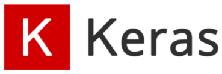

# Hyperparameters(Original)
HIDDEN = 1024
ACTIVATION = 'relu' 
DROPOUT_RATE = 0.5
LEARNING_RATE = 1e-2
BATCH_SIZE = 32

OUTPUTS = y_train.shape[-1]
model = keras.Sequential([
    layers.Dense(HIDDEN, activation=ACTIVATION),
    layers.BatchNormalization(),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(HIDDEN, activation=ACTIVATION),
    layers.BatchNormalization(),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(HIDDEN, activation=ACTIVATION),
    layers.BatchNormalization(),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(OUTPUTS),
])

オートエンコーダーのような形にしてみる。→だめだった。😢<br>
10epochもやらないで終わっている。学習がうまくできていない感じ。なんでだろう。<br>
わからない。とりあえずkerasの層を増やしてみた。いろいろやってみるしかないかなあ。

In [ ]:
# Hyperparameters
HIDDEN = 1024
ACTIVATION = 'relu' 
DROPOUT_RATE = 0.5
LEARNING_RATE = 1e-2
BATCH_SIZE = 32

OUTPUTS = y_train.shape[-1]
model = keras.Sequential([
    layers.Dense(HIDDEN, activation=ACTIVATION),
    layers.BatchNormalization(),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(HIDDEN, activation=ACTIVATION),
    layers.BatchNormalization(),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(HIDDEN, activation=ACTIVATION),
    layers.BatchNormalization(),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(OUTPUTS),
])

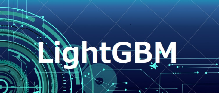

### とんでもなく時間がかかるのであきらめました。残骸だけ残します。。。。

In [ ]:
y_train1 = y_train['target1']
y_train2 = y_train['target2']
y_train3 = y_train['target3']
y_train4 = y_train['target4']

In [ ]:
#import lightgbm as lgb
#from sklearn.multioutput import MultiOutputRegressor
#import warnings
#warnings.simplefilter('ignore')

#params1 = {
# 'objective':'mae',
# 'reg_alpha': 0.1,
 #'reg_lambda': 0.1, 
# 'learning_rate': 0.1,
# 'random_state': 42,
# "num_leaves": 100
#}
#params={'learning_rate': 0.5,
#        'objective':'mae', 
#        'metric':'mae',
#        'num_leaves': 9,
#        'bagging_fraction': 0.7,
#        'feature_fraction': 0.7,
#        'verbose':-1
#       }
#reg = lgb.LGBMRegressor(**params1, n_estimators=1,force_row_wise=True)
#reg = MultiOutputRegressor(lgb.LGBMRegressor(**params1, n_estimators=1,force_row_wise=True))

#reg.fit(X_train, y_train1)
#reg.predict(X_valid)

In [ ]:
OUTPUTS #4748columnsを指定している

In [ ]:
X_train[:5]

In [ ]:
y_train[:5]

### このロジックだったら、重要そうな項目を追加するのは容易な気がする。→すいません。気のせいでした。😢

In [ ]:
%%time
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE) #1e-2

model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

early_stopping = keras.callbacks.EarlyStopping(patience=3)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[early_stopping],
)

# Create Submission #

In [ ]:
pids_test,

playerIdでmergeしている。データがない部分はNaNになっている。

In [ ]:
#X = X.merge(pids_test, how='right')
#X

In [ ]:
def make_test_data(test_dfs: dict, features, deterministic):
    X = make_playerBoxScores(test_dfs, features)
    X = X.merge(pids_test, how='right')
    X['date'] = X.date.fillna(method='ffill').fillna(method='bfill')
    X.fillna(-1, inplace=True)
    # Convert from long to wide format
    X = X.pivot(index='date', columns="playerId")
    # Create temporal features
    X = pd.concat([
        X,
        deterministic.out_of_sample(steps=1, forecast_index=X.index),
    ],
                  axis=1)
    return X

In [ ]:
def make_predictions(model, X, columns, targets):
    y_pred = model.predict(X)
    y_pred = pd.DataFrame(y_pred, columns=columns, index=X.index).stack()
    y_pred[targets] = y_pred[targets].clip(0, 100)
    y_pred['date_playerId'] = [
        (date + 1).strftime('%Y%m%d') + '_' + str(playerId)
        for date, playerId in y_pred.index
    ]
    y_pred.reset_index('playerId', drop=True, inplace=True)
    y_pred = y_pred[['date_playerId'] + targets]  # reorder
    y_pred.index = pd.Int64Index(
        [int(date.strftime('%Y%m%d')) for date in y_pred.index], name='date')
    return y_pred

In [ ]:
import mlb

env = mlb.make_env()
iter_test = env.iter_test()

In [ ]:
for (test_df, sample_prediction_df) in iter_test:
    # Unpack features from test_df
    test_dfs = unpack_data(test_df, dfs=['playerBoxScores'])
    X = make_test_data(test_dfs, features, deterministic)

    # Create predictions
    y_pred = make_predictions(
        model,
        X,
        columns=y_train.columns,
        targets=targets,
    )
    submission = (
        sample_prediction_df
        [['date_playerId']]
        .reset_index()  #  preserve index 'date'
        .merge(y_pred, how='left', on='date_playerId')
        .set_index('date')  #  restore index 'date'
    )

    # Submit predictions
    env.predict(submission)  # constructs submissions.csv

In [ ]:
test_dfs = unpack_data(test_df, dfs=['playerBoxScores'])
test_dfs

In [ ]:
X = make_test_data(test_dfs, features, deterministic)
X

In [ ]:
y_pred = make_predictions(
        model,
        X,
        columns=y_train.columns,
        targets=targets,
    )
y_pred

とりあえず、3回目のゴール。ここから点数あげていきます。<br>
